<a href="https://colab.research.google.com/github/Malhinova/Kaggle-Competition/blob/main/notebook07ffeabc66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imaterialist-challenge-furniture-2018:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F8220%2F44216%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T195858Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D25f876838b1431ac6176c35dd961d7dbf9f6c064471cc422cdbde68a3673b6621732d2e95ccb5c0c02f9c7bfb929bb92fd289f97674f264c286d35983b014dc27f4c598cd08a26d28211fa01e5055f0bbca087c916bf93ce321d10c5da4857bd1ecc6765fc4fa0fa40b9e772e2e661ff6def4497b410d273ff4eb8172e088872193da24028ad4efea5761176a62ebe054f7f95948cd65ea4cd7420f5447bdd1573e1a45a115ac936754e721b4a63cc3e826495f94600a7a98184519217d12c82bc5af19e88074035e6066213dfcdfe778be44c348438cdfe349d1fefdebc187bed7feed446976985c30223d5ef9aabebf9a3f7e113b8ec9f692fd0b6464f6f3e,imaterialist-furniture-fgvc5:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2463428%2F4174563%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T195858Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D87cdab55796bd2e8b0f94326b0af3785716baa5487f2c7649a079c962f2d6a666e1a23d218db4453d07fba26bfe2ba18ca5435b3e0c2cf9dadf90e71a14f0481f68dc986ebe599065059c5d8682403ae6ee2d22424d3eadccbe1af8920f0a31c5196df0d66ae1bd2f4058f9c347930f3fa6c21ecdae3ed523245e6b225ff8edf5d1acd9279707b738a3842cd48413ef7600ebaaf97079664c667994903142c79a1d6bc624683fc86b8b48619e8f56c50c55e28e9ae4ccd31c86cf53aca3a59e69cae8198f8f8a382ee85ad93a58d7cf83c72bd800e84121d05c5e19b0b0829ebf1dc9c53c43a54b77380f4fb6e724e98dfb8a56069cd99188d52e8535b060401,resnet/pytorch/resnet/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F16688%2F20112%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240425%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240425T195858Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D732f4c30b9c8458f48bc3fd3aad0da9713451e426b006df69e888fc8698d94993582240c2aff3cd16d426ca051eb51bc28b0a4c3f999b5f1e1276fc68ed14a831b47b1314e50e47fd66176fef998f3de3d317581f499228b4bf2b64ad5bdd10e20fb6025ebf4d378a4c88cdaf22672f0e7b387c0e6421cc95c6f88150829a40c2d8a36f2bfd9b3652098bd514fb67bf347e75f33c7ef09989fed55f29a1239f01dae84738e4cefd066128479be340d8aebab7d12166926e406bdffaecbea5421759a6e3e45d2029858f0a1e8578770da1554702469a1a06afb47b540e61afc03949d9bb62c4b6e1a0defad38f635a5c42cd4a6794025cf8df53c8ebe2ac2b726'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch import optim
from PIL import Image
import pathlib as p
import os
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset

import torchvision
from torchvision import transforms, models
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda
%matplotlib inline

In [ ]:
train = pd.read_json('/kaggle/input/imaterialist-challenge-furniture-2018/train.json')
test = pd.read_json('/kaggle/input/imaterialist-challenge-furniture-2018/test.json')
val = pd.read_json('/kaggle/input/imaterialist-challenge-furniture-2018/validation.json')

# function to format the dataset
def format_dataset(df):
    df['image_id'] = df.annotations.map(lambda x: x['image_id'])
    df['label_id'] = df.annotations.map(lambda x: x['label_id'])
    df['url'] = df.images.map(lambda x: x['url'][0])
    df.drop(columns=['annotations', 'images'], inplace=True)

format_dataset(train)
format_dataset(val)
# view the dataset snapshot
train.head(10)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194828 entries, 0 to 194827
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  194828 non-null  int64 
 1   label_id  194828 non-null  int64 
 2   url       194828 non-null  object
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


In [ ]:
def format_dataset2(df):
    df['image_id'] = df.images.map(lambda x: x['image_id'])
    df['url'] = df.images.map(lambda x: x['url'][0])
    df.drop(columns=['images'], inplace=True)
format_dataset2(test)
test.head()

,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg
2,3,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...
3,4,https://img13.360buyimg.com/imgzone/jfs/t16498...
4,5,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...


In [ ]:
class Config:
    # Training
    epochs = 3
    learning_rate = 0.001
    num_classes = 129
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    batch_size = 64
    num_workers = 2
    # Data transformation
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)
    resize_to = 256
    img_size = 224
    anotation_file_root = '/kaggle/input/imaterialist-furniture-fgvc5/{}.csv'
    images_path = '/kaggle/input/imaterialist-furniture-fgvc5/images/{}'
    test_anotation_file_root = '/kaggle/working/test_df.csv'

In [ ]:
def get_transforms(data_subset):
    """
    Generates composed set of transformations for a given dataset split.

    Arguments:
    data_subset -- string, one of ['train', 'test', 'valid']

    Return:
    transformations -- transforms.Compose, a set of transformations
    """
    if data_subset == 'train':
        transformations = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((Config.resize_to,Config.resize_to)),
               transforms.RandomResizedCrop(Config.img_size),
                transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(Config.mean, Config.std)

        ])
    else:
        transformations = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((Config.img_size,Config.img_size)),
            transforms.ToTensor(),
            transforms.Normalize(Config.mean, Config.std),



                                              ])
    return transformations


In [ ]:
class Train_Dataset(TensorDataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.shuffle()

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, f'{self.img_labels.iloc[idx, 0]}.jpg')
        image = read_image(img_path)
        image = self.transform(image)
        label = self.img_labels.iloc[idx, 1]
        return image, label


    def shuffle(self):
        self.img_labels = self.img_labels.sample(frac=1).reset_index(drop=True)


In [ ]:
class Test_Dataset(TensorDataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.img_ids = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        image_id = self.img_ids.iloc[idx, 0]
        img_path = os.path.join(self.img_dir, f'{self.img_ids.iloc[idx, 0]}.jpg')
        try:
            image = read_image(img_path)
            image = self.transform(image)
            return image, image_id
        except:
            return [], image_id

In [ ]:

test.to_csv('/kaggle/working/test_df.csv', index=False)

In [ ]:
dfs = {
    'test': test,
    'train': train,
    'validation': val
}
dataloaders = {}
image_datasets = {}
for name in ['train', 'validation', 'test']:
    if name == 'test':
        image_datasets[name] = Test_Dataset(Config.test_anotation_file_root,
                                     Config.images_path.format(name),
                                     transform=get_transforms(name))
        dataloaders[name] = DataLoader(image_datasets[name],
                                       shuffle=False,
                                       num_workers=0)
    else:
        image_datasets[name] = Train_Dataset(Config.anotation_file_root.format(name),
                                     Config.images_path.format(name),
                                     transform=get_transforms(name))
        dataloaders[name] = DataLoader(image_datasets[name],
                                       shuffle=True,
                                       batch_size=Config.batch_size,
                                       num_workers=0)
#len(train_loader)

In [ ]:
from torch.utils.data import DataLoader, Subset

In [ ]:
len(image_datasets['train'])
half_len = len(image_datasets['train']) // 2
indices_subset = list(range(half_len))

# Create a Subset of the dataset
dataset_subset = Subset(image_datasets['train'], indices_subset)

# Create a DataLoader from the subset
batch_size = Config.batch_size
train_loader = DataLoader(dataset_subset, batch_size=Config.batch_size, shuffle=True,num_workers=0)
len(train_loader)

1135

In [ ]:
len(dataloaders['test'])

12800

In [ ]:
def tensor_to_array(img, mean = Config.mean, std = Config.std):
    np_im=img.numpy()
    np_img = np.transpose(np_im, axes=(1, 2, 0))
    np_img = np_img*Config.std+Config.mean
    np_img = np.clip(np_img, 0, 1)
    return np_img

In [ ]:
def show_grid(grid, title=None):
    """
    displays a grid of images
    """
    np_grid = tensor_to_array(grid)

    # display
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(np_grid)
    if title is not None:
        plt.title(title)

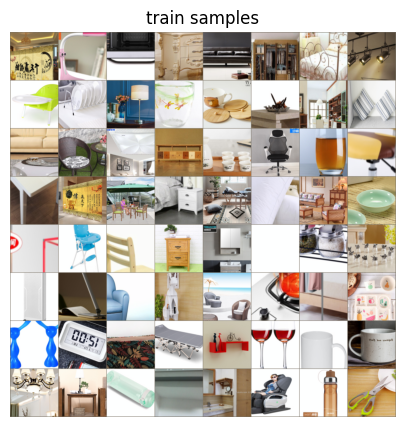

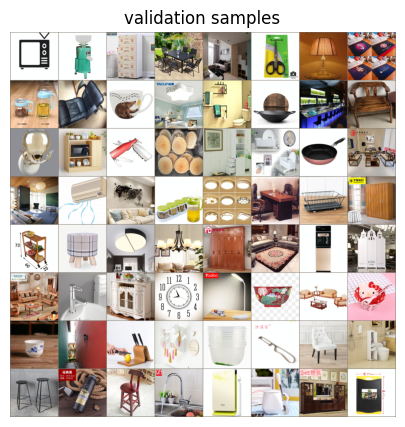

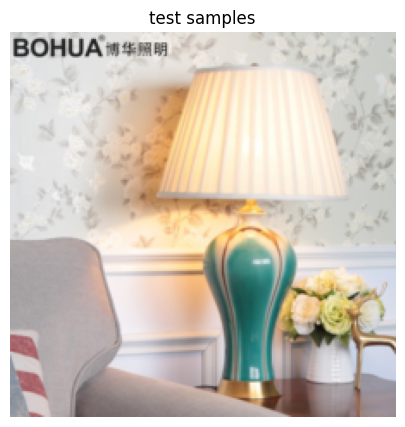

In [ ]:
for name in ['train', 'validation', 'test']:
    for imgs, _ in dataloaders[name]:
        if imgs != []:
            out = make_grid(imgs)
            show_grid(out, f'{name} samples')
            break
        else:
            continue

In [ ]:
class ResNet(nn.Module):
    def __init__(self, freeze=True):
        super(ResNet, self).__init__()
        self.resnet = torchvision.models.resnet18(pretrained=True)
        if freeze:
            self.freeze_resnet()
        output_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(output_features, Config.num_classes)

    def freeze_resnet(self):
        for param in self.resnet.parameters():
            param.requires_grad = False

    def forward(self, x):
        x = self.resnet(x)
        return x

In [ ]:
def train(model, optimizer, criterion, train_loader, valid_loader,
          num_epochs=Config.epochs, valid_loss_min=np.inf, device=Config.device):
    callbackers = {}
    callbackers['train_loss'] = []
    callbackers['valid_loss'] = []
    callbackers['accuracy'] = []
    callbackers['f1_macro'] = []
    i=0
    for e in range(num_epochs):
        train_loss = 0.0
        valid_loss = 0.0
        model.train()
        for imgs, labels in train_loader:
            i=i+1
            imgs = imgs.to(device)
            labels = labels.to(device)
            out =model.forward(imgs)
            loss = criterion(out, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if i%1000==0: print(i)
            train_loss += loss.item()*imgs.shape[0]
        model.eval()
        with torch.no_grad():
            targets, predictions = [], []
            for imgs, labels in valid_loader:
                imgs = imgs.to(device)
                labels = labels.to(device)

                out = model.forward(imgs)
                loss = criterion(out, labels)

                labels = labels.cpu()
                prediction = torch.argmax(out, 1)
                prediction = prediction.cpu()
                target = labels.numpy()
                predictions.extend(prediction)
                targets.extend(target)
                valid_loss += loss.item()*imgs.shape[0]
        train_loss /= len(train_loader.sampler)
        valid_loss /= len(valid_loader.sampler)
        acc = accuracy_score(predictions, targets)
        f1_macro = f1_score(predictions, targets, average='macro')

        print(f'Epoch: {e+1} TrainLoss: {train_loss:.3f} ValidLoss: {valid_loss:.3f} ACC: {acc:.3f} F1_MACRO: {f1_macro}')

        callbackers['train_loss'].append(train_loss)
        callbackers['valid_loss'].append(valid_loss)
        callbackers['accuracy'].append(acc)
        callbackers['f1_macro'].append(f1_macro)
        if valid_loss <= valid_loss_min:
            torch.save(model.state_dict(), 'ResNet.pt')
            valid_loss_min = valid_loss

    return callbackers

In [ ]:
def visualize_callbackers(callbackers):
    fig, ax =  plt.subplots(2, 1, figsize=(10, 6))
    ax[0].plot(callbackers['train_loss'], label='Train Loss')
    ax[0].plot(callbackers['valid_loss'], label='Valid Loss')
    ax[0].set_title('Losses')
    ax[0].legend()
    ax[1].plot(callbackers['accuracy'], label='Accuracy')
    ax[1].plot(callbackers['f1_macro'], label='F1-macro')
    ax[1].set_title('Classification metrics')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

In [ ]:

def evaluate(model, criterion, test_loader, device=Config.device):
    model.eval()
    with torch.no_grad():
        targets, predictions = [], []
        overall_loss = 0
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            out = model.forward(imgs)
            loss = criterion(out, labels)
            prediction = torch.argmax(out, 1)
            labels = labels.cpu()
            prediction = prediction.cpu()
            target =labels.numpy()
            targets.extend(target)
            predictions.extend(prediction)
            overall_loss += loss.item()*imgs.shape[0]
        overall_loss /= len(test_loader.sampler)
        accuracy = accuracy_score(targets, predictions)
        f1_macro = f1_score(targets, predictions, average='macro')
        return {'targets': targets,
                'predictions': predictions,
                'accuracy': accuracy,
                'f1_macro': f1_macro,
                'loss': overall_loss
                }

In [ ]:
# if torch.cuda.is_available():
#     print("CUDA is available!")
# else:
#     print("CUDA is not available.")
# model = ResNet(freeze=False).to(Config.device)
# optimizer = optim.Adam(model.parameters(), lr=Config.learning_rate)
# criterion = nn.CrossEntropyLoss()
# callbackers = train(model, optimizer, criterion, train_loader, dataloaders['validation'])
# visualize_callbackers(callbackers)

In [ ]:
predictions = []
true_labels = []
data = []
def prediction(model, loader):
# Set the model to evaluation mode
    model2.eval()

    # Iterate over batches in the test loader
    for img, img_id in loader:
        if img == []:
                predicted = 42
                img_id = img_id.cpu().item()

        else:
            img = img.to(Config.device)
            img_id = img_id.to(Config.device)
            with torch.no_grad():
                    out = model.forward(img)
                    _, predicted = torch.max(out, 1)
                    predicted = predicted.cpu()
                    predicted = predicted.detach().numpy()[0]
                    img_id = img_id.cpu().item()
        data.append({'id': img_id, 'predicted': predicted})
        df = pd.DataFrame(data)
    return df



In [ ]:
model2 = ResNet(freeze=False).to(Config.device)
model2.load_state_dict(torch.load('/kaggle/input/resnet/pytorch/resnet/1/ResNet.pt'))
submission = prediction(model2, dataloaders['test'])





In [ ]:

submission.head(10)

In [ ]:
submission.to_csv('submission.csv', index=False)